In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.preprocessing import MinMaxScaler

#Regressoors
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from xgboost import XGBRegressor

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#PCA
from sklearn.decomposition import RandomizedPCA, PCA
#MDS
from sklearn.manifold import MDS
#SNE
from sklearn.manifold import TSNE

#Train Test Split
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interact_manual

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Данные по Яблочной кислоте

In [2]:
Data_Apple = pd.read_csv('20190311.txt', sep=' ')
Data_Apple = Data_Apple.iloc[:1024,4:-1].T
Vals = Data_Apple.iloc[0,:].values
Data_Apple.iloc[0,:] = map(lambda x : int(x), Vals)
Data_Apple['label'] = np.array([0]*Data_Apple.shape[0])
Data_Apple.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
Spectrum1,116,47,83,69,91,60,50,99,83,55,...,883,861,857,883,882,862,825,831,884,0
Spectrum2,90,55,58,72,44,57,65,83,83,99,...,822,812,786,825,829,783,791,805,835,0
Spectrum3,81,72,85,75,85,60,45,61,68,67,...,688,699,656,699,688,703,680,658,716,0
Spectrum4,98,72,59,79,70,69,64,77,85,95,...,771,748,767,750,747,759,773,751,774,0
Spectrum5,93,71,47,48,79,56,49,61,62,51,...,741,731,709,748,734,708,709,723,728,0
Spectrum6,111,48,33,63,57,72,83,55,80,50,...,707,681,691,680,693,686,696,683,726,0
Spectrum7,112,47,84,83,34,77,51,61,62,84,...,851,838,825,856,818,814,814,813,862,0
Spectrum8,94,63,71,87,87,65,80,67,80,49,...,781,765,772,744,767,747,774,762,778,0
Spectrum9,88,38,65,101,78,69,47,65,71,76,...,853,851,830,821,840,811,808,832,839,0
Spectrum10,76,72,46,86,77,68,53,52,55,72,...,762,761,725,756,743,742,744,744,784,0


## Данные по Винной кислоте

In [3]:
Data_Wine = pd.read_csv('20190312.txt', sep=' ')
Data_Wine = Data_Wine.iloc[:1024,4:-1].T
Vals = Data_Wine.iloc[0,:].values
Data_Wine.iloc[0,:] = map(lambda x : int(x), Vals)
Data_Wine['label'] = np.array([1]*Data_Wine.shape[0])
Data_Wine.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
Spectrum1,56,57,55,56,68,50,13,37,43,39,...,1069,1069,1048,1066,1058,1035,1066,1040,1048,1
Spectrum2,59,40,38,69,51,50,66,52,43,73,...,1082,1078,1085,1124,1095,1070,1067,1055,1085,1
Spectrum3,51,46,41,37,43,40,38,62,51,71,...,1169,1181,1178,1185,1179,1139,1151,1147,1150,1
Spectrum4,76,37,84,39,48,11,41,57,56,57,...,1168,1147,1109,1183,1139,1119,1154,1107,1136,1
Spectrum5,50,60,30,56,58,62,41,56,62,83,...,1025,1013,1000,1024,1021,1040,1005,987,994,1
Spectrum6,52,60,28,63,36,42,48,36,44,67,...,971,986,986,976,995,959,957,970,994,1
Spectrum7,42,46,48,48,57,49,31,41,37,69,...,930,928,926,966,959,911,934,941,942,1
Spectrum8,57,53,32,37,46,60,30,30,51,72,...,865,876,890,888,888,878,870,855,868,1
Spectrum9,63,59,23,55,33,47,42,50,54,68,...,832,847,831,840,835,818,811,820,830,1
Spectrum10,65,65,48,36,45,18,35,37,14,64,...,806,789,764,776,782,806,750,776,766,1


## Объединим оба датасета

In [4]:
Data = pd.merge(Data_Apple, Data_Wine, how='outer')
Data

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,116.0,47.0,83.0,69.0,91.0,60.0,50.0,99.0,83.0,55.0,...,883.0,861.0,857.0,883.0,882.0,862.0,825.0,831.0,884.0,0
1,90.0,55.0,58.0,72.0,44.0,57.0,65.0,83.0,83.0,99.0,...,822.0,812.0,786.0,825.0,829.0,783.0,791.0,805.0,835.0,0
2,81.0,72.0,85.0,75.0,85.0,60.0,45.0,61.0,68.0,67.0,...,688.0,699.0,656.0,699.0,688.0,703.0,680.0,658.0,716.0,0
3,98.0,72.0,59.0,79.0,70.0,69.0,64.0,77.0,85.0,95.0,...,771.0,748.0,767.0,750.0,747.0,759.0,773.0,751.0,774.0,0
4,93.0,71.0,47.0,48.0,79.0,56.0,49.0,61.0,62.0,51.0,...,741.0,731.0,709.0,748.0,734.0,708.0,709.0,723.0,728.0,0
5,111.0,48.0,33.0,63.0,57.0,72.0,83.0,55.0,80.0,50.0,...,707.0,681.0,691.0,680.0,693.0,686.0,696.0,683.0,726.0,0
6,112.0,47.0,84.0,83.0,34.0,77.0,51.0,61.0,62.0,84.0,...,851.0,838.0,825.0,856.0,818.0,814.0,814.0,813.0,862.0,0
7,94.0,63.0,71.0,87.0,87.0,65.0,80.0,67.0,80.0,49.0,...,781.0,765.0,772.0,744.0,767.0,747.0,774.0,762.0,778.0,0
8,88.0,38.0,65.0,101.0,78.0,69.0,47.0,65.0,71.0,76.0,...,853.0,851.0,830.0,821.0,840.0,811.0,808.0,832.0,839.0,0
9,76.0,72.0,46.0,86.0,77.0,68.0,53.0,52.0,55.0,72.0,...,762.0,761.0,725.0,756.0,743.0,742.0,744.0,744.0,784.0,0


## Калибровочный файл : из каналов в нм

In [5]:
chnl_to_nm = pd.read_csv('calibration_chnl_to_nm').values

## Избавляемся от шумов

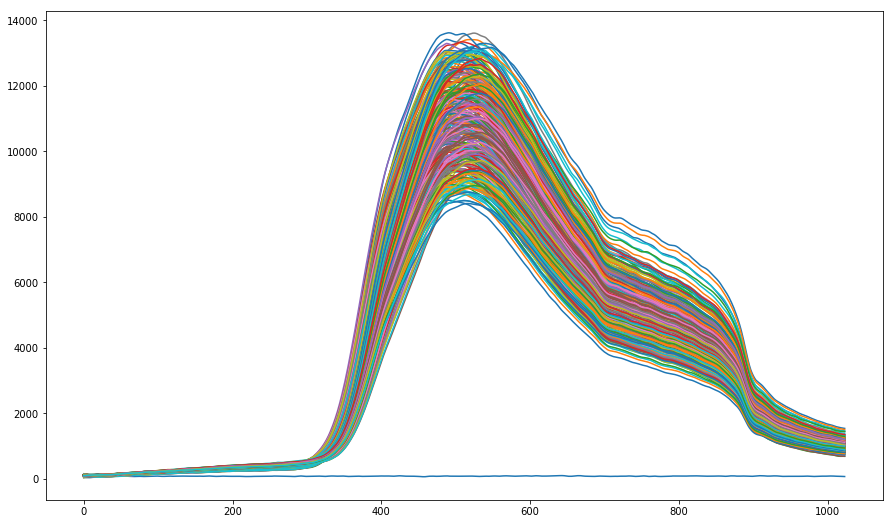

In [22]:
data_lowess_1 = list()
plt.figure(figsize=(15,9))
for i in range(Data.shape[0]) :
    x = range(Data.shape[1]-1)
    y = Data.iloc[i,:-1].values
    lowess = sm.nonparametric.lowess(y, x, frac=0.015)
    plt.plot(lowess[:,0], lowess[:,1])
    data_lowess_1.append(lowess[:,1])

lowess_df = pd.DataFrame(np.array(data_lowess_1))

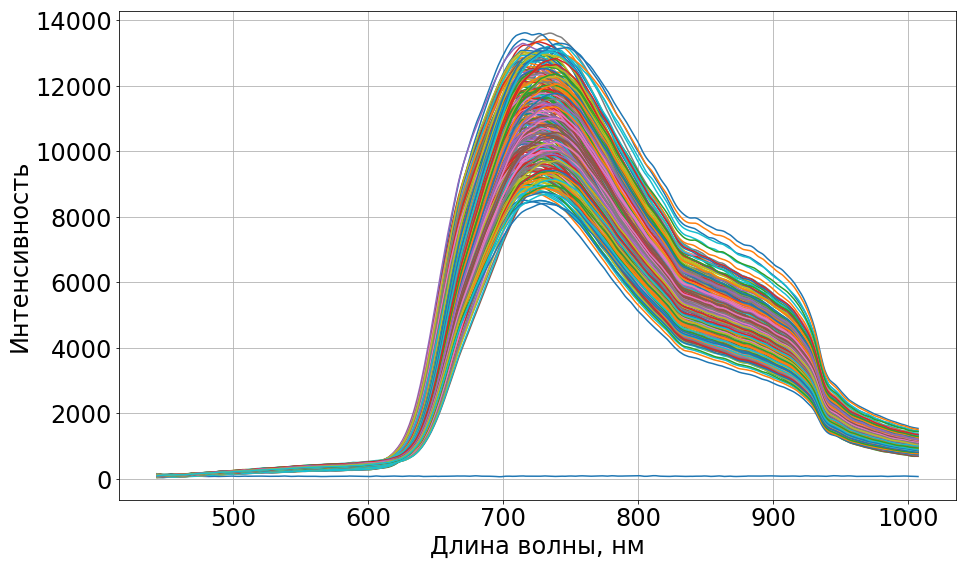

In [25]:
plt.figure(figsize=(15,9))
for i in range(lowess_df.shape[0]):
    plt.plot(chnl_to_nm, lowess_df.iloc[i,:])
plt.xlabel(u'Длина волны, нм', fontsize=24)
plt.ylabel(u'Интенсивность', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.savefig('acid_type_initial_spectra.pdf')

## MinMaxScaling

In [26]:
scaler = MinMaxScaler()
#for i in range(lowess_df.shape[0]):
scaler.fit(lowess_df.T)
scaled_lowess_df = pd.DataFrame(scaler.transform(lowess_df.T)).T

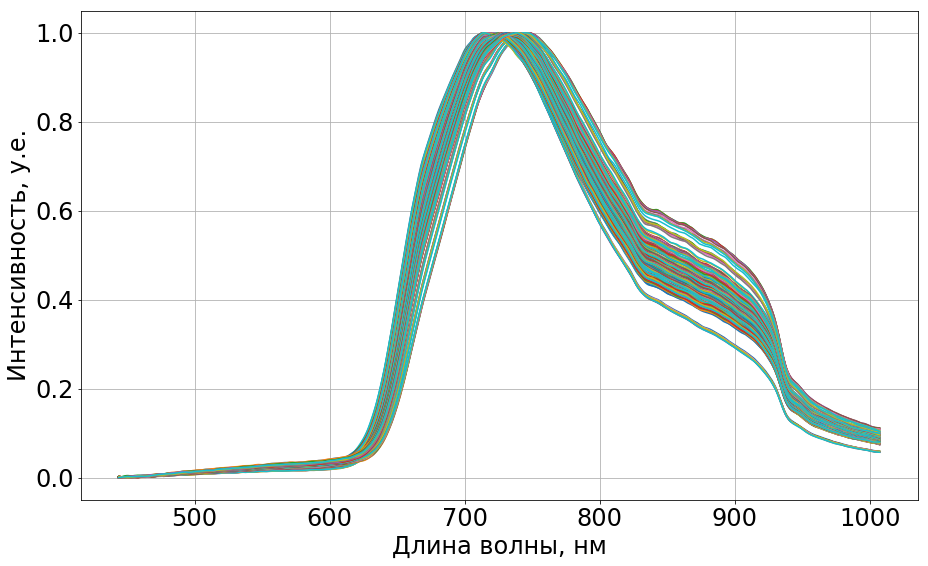

In [30]:
plt.figure(figsize=(15,9))
for i in range(scaled_lowess_df.shape[0]):
    plt.plot(chnl_to_nm ,scaled_lowess_df.iloc[i,:].values)
    
plt.xlabel(u'Длина волны, нм', fontsize=24)
plt.ylabel(u'Интенсивность, у.е.', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.savefig('acid_type_scaled_spectra.pdf')

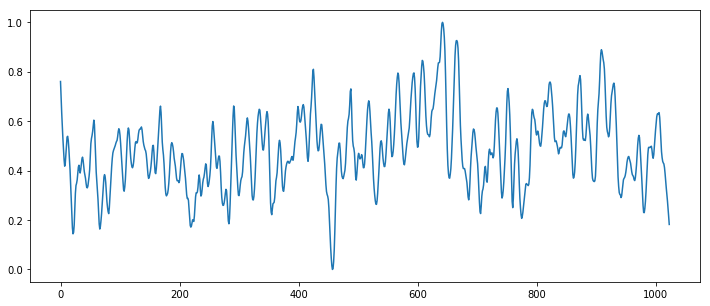

In [28]:
## Удалим заменим шумовой спектр на соседний
plt.figure(figsize=(12,5))
plt.plot(range(scaled_lowess_df.shape[1]) ,scaled_lowess_df.iloc[70,:].values)
scaled_lowess_df.iloc[70,:] = scaled_lowess_df.iloc[72,:].values

In [32]:
pH = np.array([3.54]*10+[3.85]*10+[3.95]*10+[4.0]*10+[4.17]*10+[4.28]*10+[4.39]*10+[3.50]*10+[3.47]*10+[3.43]*10+[3.39]*10+[3.35]*10+[3.30]*10+[3.24]*10+[3.51]*10+[3.47]*10+[3.44]*10+[3.40]*10+[3.36]*10+[3.32]*10+[3.28]*10+[3.24]*10+[3.55]*10+[3.60]*10+[3.65]*10+[3.70]*10+[3.75]*10+[3.80]*10+[3.86]*10+[3.92]*10)
scaled_lowess_df['pH'] = pH
scaled_lowess_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,pH
0,0.001379,0.001193,0.001012,0.000832,0.000651,0.000474,3.057827e-04,0.000176,0.000066,0.000010,...,0.060655,0.060394,0.060073,0.059802,0.059561,0.059329,0.059095,0.058852,0.058603,3.54
1,0.000000,0.000073,0.000156,0.000244,0.000332,0.000415,4.981257e-04,0.000623,0.000718,0.000792,...,0.059426,0.059048,0.058792,0.058616,0.058466,0.058328,0.058196,0.058070,0.057957,3.54
2,0.001485,0.001264,0.001050,0.000846,0.000656,0.000480,3.068933e-04,0.000111,0.000025,0.000000,...,0.058844,0.058705,0.058645,0.058640,0.058660,0.058689,0.058721,0.058753,0.058784,3.54
3,0.000582,0.000540,0.000508,0.000479,0.000452,0.000427,4.093948e-04,0.000439,0.000445,0.000473,...,0.058653,0.058316,0.058176,0.058078,0.057992,0.057918,0.057861,0.057824,0.057804,3.54
4,0.001486,0.001254,0.001030,0.000806,0.000579,0.000356,1.477425e-04,0.000017,0.000000,0.000025,...,0.059389,0.059087,0.058767,0.058500,0.058245,0.057995,0.057747,0.057502,0.057266,3.54
5,0.000000,0.000268,0.000516,0.000741,0.000949,0.001145,1.341696e-03,0.001549,0.001664,0.001727,...,0.059985,0.059739,0.059569,0.059438,0.059321,0.059215,0.059124,0.059050,0.058996,3.54
6,0.001387,0.001170,0.000963,0.000767,0.000580,0.000399,2.297745e-04,0.000096,0.000010,0.000000,...,0.059778,0.059516,0.059221,0.058967,0.058722,0.058470,0.058210,0.057944,0.057680,3.54
7,0.001607,0.001448,0.001279,0.001102,0.000920,0.000738,5.647506e-04,0.000405,0.000198,0.000049,...,0.057702,0.057466,0.057366,0.057310,0.057258,0.057210,0.057168,0.057139,0.057123,3.54
8,0.000487,0.000420,0.000353,0.000288,0.000230,0.000183,1.497619e-04,0.000126,0.000060,0.000006,...,0.059209,0.059117,0.059037,0.059011,0.058986,0.058953,0.058909,0.058859,0.058810,3.54
9,0.000619,0.000506,0.000396,0.000291,0.000197,0.000117,5.210377e-05,0.000000,0.000023,0.000076,...,0.058195,0.057922,0.057703,0.057534,0.057377,0.057225,0.057081,0.056947,0.056831,3.54


## PCA

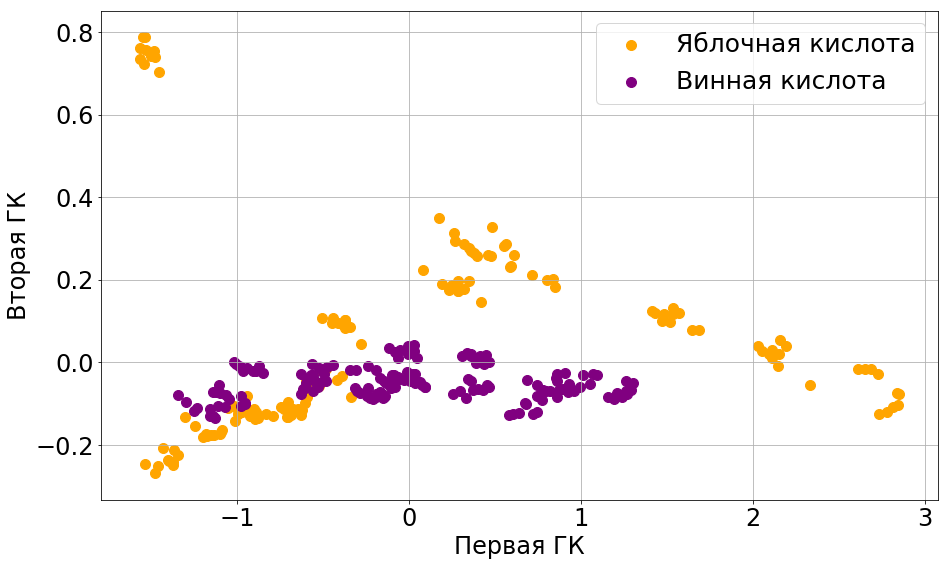

In [44]:
pca_model = PCA(n_components=3)
pca_data = pd.DataFrame(pca_model.fit_transform(scaled_lowess_df.drop('pH', axis=1)))
pca_data['pH'] = scaled_lowess_df.pH.values
pca_data['label'] = np.array([0]*Data_Apple.shape[0]+[1]*Data_Wine.shape[0])

plt.figure(figsize=(15,9))
plt.scatter(pca_data[pca_data.label == 0].iloc[:,0], pca_data[pca_data.label == 0].iloc[:,1],c='orange' ,s=100, label=u'Яблочная кислота')
plt.scatter(pca_data[pca_data.label == 1].iloc[:,0], pca_data[pca_data.label == 1].iloc[:,1],c='purple' ,s=100, label=u'Винная кислота')

plt.xlabel(u'Первая ГК', fontsize=24)
plt.ylabel(u'Вторая ГК', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.legend(fontsize=25)
plt.savefig('acid_type_pca_plot.pdf')

## Отсортируем по значению pH

In [45]:
pca_data.sort_values('pH', axis=0, inplace=True)
pca_data.head(20)

,0,1,2,pH,label
132,-1.399207,-0.235639,0.206616,3.24,0
131,-1.461157,-0.251604,0.213555,3.24,0
139,-1.475701,-0.268930,0.219869,3.24,0
138,-1.429189,-0.206815,0.244457,3.24,0
137,-1.396684,-0.238670,0.211495,3.24,0
136,-1.374715,-0.240688,0.191344,3.24,0
135,-1.364206,-0.212886,0.215779,3.24,0
134,-1.342249,-0.224753,0.203195,3.24,0
130,-1.538078,-0.246964,0.227150,3.24,0
210,-1.342037,-0.078811,0.149157,3.24,1


In [46]:
pca_data.drop_duplicates(subset='pH')

,0,1,2,pH,label
132,-1.399207,-0.235639,0.206616,3.24,0
209,-1.142189,-0.071284,0.085252,3.28,1
120,-1.085808,-0.165003,0.070284,3.30,0
199,-0.850390,-0.025905,0.001608,3.32,1
119,-0.887699,-0.119492,0.014045,3.35,0
188,-0.617216,-0.064888,-0.027508,3.36,1
100,-0.887560,-0.128085,0.019840,3.39,0
171,-0.523792,-0.013694,-0.022009,3.40,1
97,-0.683495,-0.126484,-0.032197,3.43,0
161,-0.150444,-0.086813,-0.083434,3.44,1


In [47]:
pca_data.to_csv('Merged_PCA_data_Apple_and_Wine.csv', sep=',')

## Попробуем определить различимы ли выборки при pH < 3.51 для двух различных добавленных кислот : Яблочной и Винной ( label = (0 , 1) )

Создадим необходимые подвыборки

In [48]:
X_apple = pca_data[pca_data.label==0]
X_apple = X_apple[X_apple.pH < 3.51].iloc[:,0].values
Y_apple = pca_data[pca_data.label==0]
Y_apple = Y_apple[Y_apple.pH < 3.51].iloc[:,1].values

X_wine = pca_data[pca_data.label==1]
X_wine = X_wine[X_wine.pH < 3.51].iloc[:,0].values
Y_wine = pca_data[pca_data.label==1]
Y_wine = Y_wine[Y_wine.pH < 3.51].iloc[:,1].values



### 1) __Аппроксимация прямой__

Построим функционал : $F(a,b) = \sum\limits_{i=1}^n\big(y_i-(ax_i+b)\big)^2 \rightarrow \min$

$\begin{equation*}
 \begin{cases}
  \displaystyle \frac{\partial F}{\partial a} = -2\sum\limits_{i=1}^n\big(y_i-(ax_i+b)\big)x_i = 0
   \\
   \displaystyle \frac{\partial F}{\partial b} = -2\sum\limits_{i=1}^n\big(y_i-(ax_i+b)\big) = 0
 \end{cases}
\end{equation*}$

$\begin{equation*}
 \begin{cases}
  \displaystyle a\sum\limits_{i=1}^nx^2_i + b\sum\limits_{i=1}^n x_i = \sum\limits_{i=1}^n x_iy_i
   \\
  \displaystyle a\sum\limits_{i=1}^nx_i + b = \sum\limits_{i=1}^n y_i
 \end{cases}
\end{equation*}$

$\begin{pmatrix}
  sum(x^2) & sum(x)
  \\
  sum(x) & 1
\end{pmatrix}
\begin{pmatrix}
  a
  \\
  b
\end{pmatrix}
= 
\begin{pmatrix}
  sum(xy)
  \\
  sum(y)
\end{pmatrix}
$
$\Rightarrow  \mathbb{A}\overset{\rightarrow}{x} = \mathbb{b}$


Решим данную систему относительно $(a,b)$

In [49]:
def approx_line(X, Y):
    # Посчитаем все необходимые суммы
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_x2 = np.sum(X*X)
    sum_xy = np.sum(X*Y)
    
    # Матрица А
    A = np.array([[sum_x2, sum_x],[sum_x, 1.0]])
    # Свободный вектор b
    b = np.array([sum_xy, sum_y])
    # Коэффициенты a,b
    coeffs = np.linalg.solve(A, b)
    
    return coeffs

In [50]:
Wine_Coeffs = approx_line(X_wine, Y_wine)
Apple_Coeffs = approx_line(X_apple, Y_apple)

Approx_X_wine = np.arange(X_wine.min(), X_wine.max(), 0.01)
Approx_Y_wine = Wine_Coeffs[0]*Approx_X_wine + Wine_Coeffs[1]

Approx_X_apple = np.arange(X_apple.min(), X_apple.max(), 0.01)
Approx_Y_apple = Apple_Coeffs[0]*Approx_X_apple + Apple_Coeffs[1]

MSE для Винной кислоты :  0.046
MSE для Яблочной кислоты :  0.0672


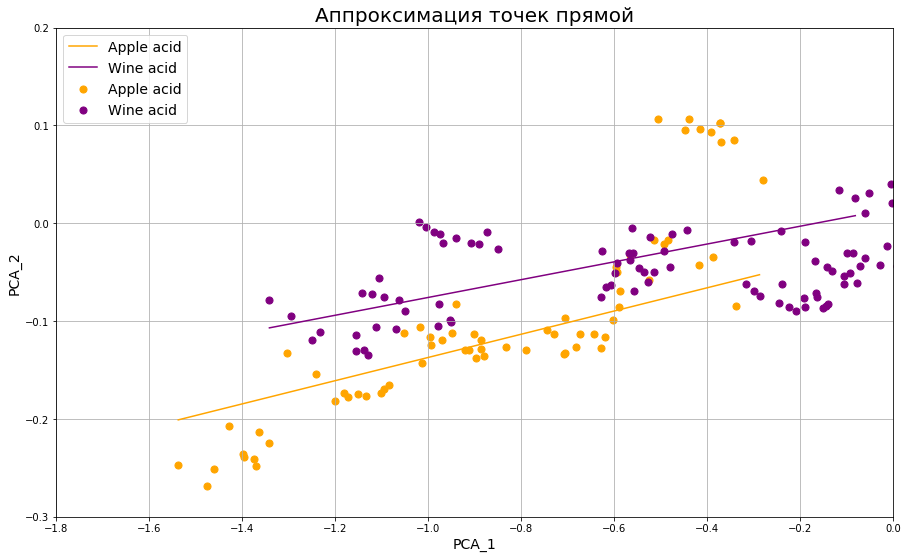

In [51]:
plt.figure(figsize=(15,9))
plt.scatter(pca_data[pca_data.label == 0].iloc[:,0], pca_data[pca_data.label == 0].iloc[:,1],c='orange' ,s=50, label='Apple acid')
plt.scatter(pca_data[pca_data.label == 1].iloc[:,0], pca_data[pca_data.label == 1].iloc[:,1],c='purple' ,s=50, label='Wine acid')
plt.plot(Approx_X_apple, Approx_Y_apple, c='orange', label='Apple acid')
plt.plot(Approx_X_wine, Approx_Y_wine, c='purple', label='Wine acid')
plt.xlim(-1.8,0)
plt.ylim(-0.3,0.2)
plt.xlabel('PCA_1', fontsize=14)
plt.ylabel('PCA_2', fontsize=14)
plt.title(u'Аппроксимация точек прямой', fontsize=20)
plt.legend(loc='upper left', fontsize=14)
plt.grid()

print 'MSE для Винной кислоты : ', np.sqrt(MSE(Y_wine, Wine_Coeffs[0]*X_wine + Wine_Coeffs[1])).round(4)
print 'MSE для Яблочной кислоты : ', np.sqrt(MSE(Y_apple, Apple_Coeffs[0]*X_apple + Apple_Coeffs[1])).round(4)

In [52]:
print Wine_Coeffs[0], Wine_Coeffs[1]
print Apple_Coeffs[0], Apple_Coeffs[1]

0.09100476846541705 0.015228121503394356
0.11867714565579497 -0.018401442436624643


### 2) __Аппроксимация параболлой__

Построим функционал : $F(a,b,c) = \sum\limits_{i=1}^n\big(y_i-(ax^2_i+bx_i+c)\big)^2 \rightarrow \min$

$\begin{equation*}
 \begin{cases}
  \displaystyle \frac{\partial F}{\partial a} = -2\sum\limits_{i=1}^n\big(y_i-(ax_i^2+bx_i+c)\big)x_i^2 = 0
   \\
   \displaystyle \frac{\partial F}{\partial b} = -2\sum\limits_{i=1}^n\big(y_i-(ax_i^2+bx_i+c)\big)x_i = 0
   \\
   \displaystyle \frac{\partial F}{\partial c} = -2\sum\limits_{i=1}^n\big(y_i-(ax_i^2+bx_i+c)\big) = 0
 \end{cases}
\end{equation*}$

$\begin{equation*}
 \begin{cases}
  \displaystyle a\sum\limits_{i=1}^nx^4_i + b\sum\limits_{i=1}^n x_i^3 + c\sum\limits_{i=1}^n x_i^2 = \sum\limits_{i=1}^n x_i^2y_i
   \\
  \displaystyle a\sum\limits_{i=1}^nx^3_i + b\sum\limits_{i=1}^n x_i^2 + c\sum\limits_{i=1}^n x_i^1 = \sum\limits_{i=1}^n x_iy_i
  \\
  \displaystyle a\sum\limits_{i=1}^nx^2_i + b\sum\limits_{i=1}^n x_i + c = \sum\limits_{i=1}^n y_i
 \end{cases}
\end{equation*}$

$\begin{pmatrix}
  sum(x^4) & sum(x^3) & sum(x^2)
  \\
  sum(x^3) & sum(x^2) & sum(x)
  \\
  sum(x^2) & sum(x) & 1
\end{pmatrix}
\begin{pmatrix}
  a
  \\
  b
  \\
  c
\end{pmatrix}
= 
\begin{pmatrix}
  sum(x^2y)
  \\
  sum(xy)
  \\
  sum(y)
\end{pmatrix}
$
$\Rightarrow  \mathbb{A}\overset{\rightarrow}{x} = \mathbb{b}$


Решим данную систему относительно $(a,b,c)$

In [53]:
def approx_parabol(X, Y):
    # Посчитаем все необходимые суммы
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    
    sum_x2 = np.sum(X*X)
    sum_xy = np.sum(X*Y)
    
    sum_x3 = np.sum(X*X*X)
    sum_x2y = np.sum(X*X*Y)
    
    sum_x4 = np.sum(X*X*X*X)
    
    
    # Матрица А
    A = np.array([[sum_x4, sum_x3, sum_x2],[sum_x3, sum_x2, sum_x], [sum_x2, sum_x, 1.0]])
    # Свободный вектор b
    b = np.array([sum_x2y, sum_xy, sum_y])
    # Коэффициенты a,b
    coeffs = np.linalg.solve(A, b)
    
    return coeffs

In [54]:
Wine_Coeffs = approx_parabol(X_wine, Y_wine)
Apple_Coeffs = approx_parabol(X_apple, Y_apple)

Approx_X_wine = np.arange(X_wine.min(), X_wine.max(), 0.01)
Approx_Y_wine = Wine_Coeffs[0]*Approx_X_wine*Approx_X_wine + Wine_Coeffs[1]*Approx_X_wine + Wine_Coeffs[2]

Approx_X_apple = np.arange(X_apple.min(), X_apple.max(), 0.01)
Approx_Y_apple = Apple_Coeffs[0]*Approx_X_apple*Approx_X_apple + Apple_Coeffs[1]*Approx_X_apple + Apple_Coeffs[2]

MSE для Винной кислоты :  0.1681
MSE для Яблочной кислоты :  0.2435


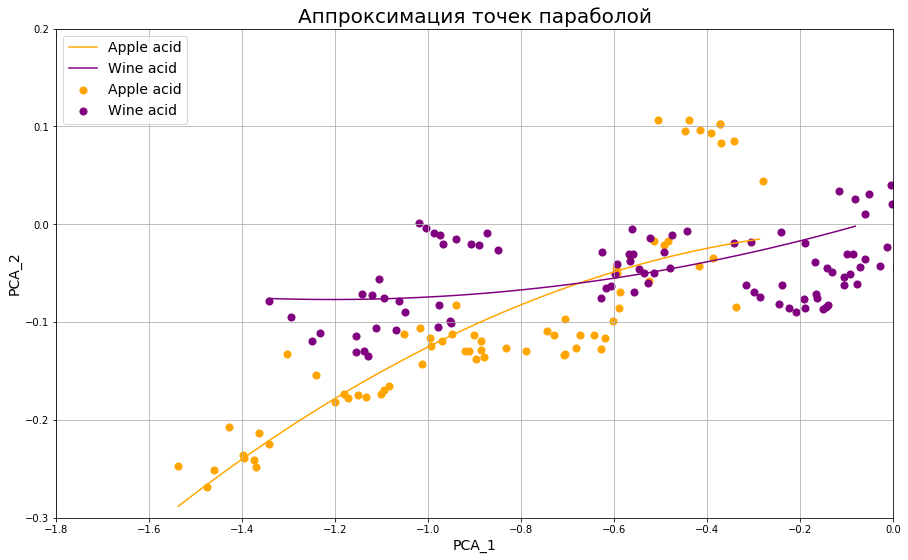

In [55]:
plt.figure(figsize=(15,9))
plt.scatter(pca_data[pca_data.label == 0].iloc[:,0], pca_data[pca_data.label == 0].iloc[:,1],c='orange' ,s=50, label='Apple acid')
plt.scatter(pca_data[pca_data.label == 1].iloc[:,0], pca_data[pca_data.label == 1].iloc[:,1],c='purple' ,s=50, label='Wine acid')
plt.plot(Approx_X_apple, Approx_Y_apple, c='orange', label='Apple acid')
plt.plot(Approx_X_wine, Approx_Y_wine, c='purple', label='Wine acid')
plt.xlim(-1.8,0)
plt.ylim(-0.3,0.2)
plt.xlabel('PCA_1', fontsize=14)
plt.ylabel('PCA_2', fontsize=14)
plt.title(u'Аппроксимация точек параболой', fontsize=20)
plt.legend(loc='upper left', fontsize=14)
plt.grid()

print 'MSE для Винной кислоты : ', np.sqrt(MSE(Y_wine, Wine_Coeffs[0]*X_wine + Wine_Coeffs[1])).round(4)
print 'MSE для Яблочной кислоты : ', np.sqrt(MSE(Y_apple, Apple_Coeffs[0]*X_apple + Apple_Coeffs[1])).round(4)

### 3) __Аппроксимация экспонентой__

Построим функционал : $F(a,b) = \sum\limits_{i=1}^n\big(y_i-(ae^{x_i}+bx_i+c)\big)^2 \rightarrow \min$



$\begin{equation*}
 \begin{cases}
  \displaystyle \frac{\partial F}{\partial a} = -2\sum\limits_{i=1}^n\big(y_i-(ae^{x_i}+bx_i+c)\big)e^{x_i} = 0
   \\
   \displaystyle \frac{\partial F}{\partial b} = -2\sum\limits_{i=1}^n\big(y_i-(ae^{x_i}+bx_i)\big)x_i = 0
   \\
   \displaystyle \frac{\partial F}{\partial c} = -2\sum\limits_{i=1}^n\big(y_i-(ae^{x_i}+bx_i)\big) = 0
 \end{cases}
\end{equation*}$

$\begin{equation*}
 \begin{cases}
  \displaystyle a\sum\limits_{i=1}^n e^{2x_i} + b\sum\limits_{i=1}^n e^{x_i}x_i + c\sum\limits_{i=1}^n e^{x_i} = \sum\limits_{i=1}^n e^{x_i}y_i
   \\
  \displaystyle a\sum\limits_{i=1}^n e^{x_i}x_i + b\sum\limits_{i=1}^n x_i^2 + c\sum\limits_{i=1}^n x_i = \sum\limits_{i=1}^n y_ix_i
  \\
  \displaystyle a\sum\limits_{i=1}^n e^{x_i} + b\sum\limits_{i=1}^n x_i + c = \sum\limits_{i=1}^n y_i
 \end{cases}
\end{equation*}$

$\begin{pmatrix}
  sum(e^{2x}) & sum(e^xx) & sum(e^x)
  \\
  sum(e^xx) & sum(x^2) & sum(x)
  \\
  sum(e^x) & sum(x) & 1
\end{pmatrix}
\begin{pmatrix}
  a
  \\
  b
  \\
  c
\end{pmatrix}
= 
\begin{pmatrix}
  sum(e^xy)
  \\
  sum(xy)
  \\
  sum(y)
\end{pmatrix}
$
$\Rightarrow  \mathbb{A}\overset{\rightarrow}{x} = \mathbb{b}$


Решим данную систему относительно $(a,b)$

In [56]:
def approx_exp(X, Y):
    # Посчитаем все необходимые суммы
    sum_ex = np.sum(np.exp(X))
    sum_e2x = np.sum(np.exp(2*X))
    sum_exx = np.sum(np.exp(X)*X)
    sum_exy = np.sum(np.exp(X)*Y)
    sum_x = np.sum(X)
    sum_x2 = np.sum(X*X)
    sum_xy = np.sum(X*Y)
    sum_y = np.sum(Y)
    
    # Матрица А
    A = np.array([[sum_e2x, sum_exx, sum_ex],[sum_exx, sum_x2, sum_x],[sum_ex, sum_x, 1.0]])
    # Свободный вектор b
    b = np.array([sum_exy, sum_xy, sum_y])
    # Коэффициенты a,b
    coeffs = np.linalg.solve(A, b)
    
    return coeffs

In [57]:
Wine_Coeffs = approx_exp(X_wine, Y_wine)
Apple_Coeffs = approx_exp(X_apple, Y_apple)

Approx_X_wine = np.arange(X_wine.min(), X_wine.max(), 0.01)
Approx_Y_wine = Wine_Coeffs[0]*np.exp(Approx_X_wine) + Wine_Coeffs[1]*Approx_X_wine + Wine_Coeffs[2]

Approx_X_apple = np.arange(X_apple.min(), X_apple.max(), 0.01)
Approx_Y_apple = Apple_Coeffs[0]*np.exp(Approx_X_apple) + Apple_Coeffs[1]*Approx_X_apple + Apple_Coeffs[2]

MSE для Винной кислоты :  0.1496
MSE для Яблочной кислоты :  0.1884


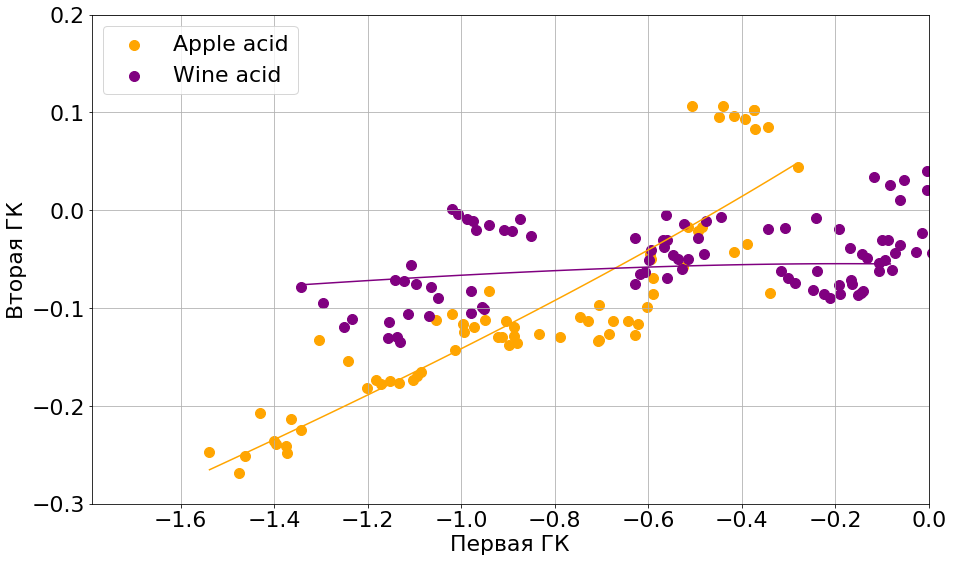

In [64]:
plt.figure(figsize=(15,9))
plt.scatter(pca_data[pca_data.label == 0].iloc[:,0], pca_data[pca_data.label == 0].iloc[:,1],c='orange' ,s=100, label='Apple acid')
plt.scatter(pca_data[pca_data.label == 1].iloc[:,0], pca_data[pca_data.label == 1].iloc[:,1],c='purple' ,s=100, label='Wine acid')
plt.plot(Approx_X_apple, Approx_Y_apple, c='orange')
plt.plot(Approx_X_wine, Approx_Y_wine, c='purple')
plt.xlim(-1.79,0)
plt.ylim(-0.3,0.2)
plt.xlabel(u'Первая ГК', fontsize=22)
plt.ylabel(u'Вторая ГК', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


#plt.title(u'Аппроксимация точек параболой', fontsize=20)
plt.legend(loc='upper left', fontsize=22)
plt.grid()
plt.savefig('acid_type_pca_approx_exp.pdf')

print 'MSE для Винной кислоты : ', np.sqrt(MSE(Y_wine, Wine_Coeffs[0]*X_wine + Wine_Coeffs[1])).round(4)
print 'MSE для Яблочной кислоты : ', np.sqrt(MSE(Y_apple, Apple_Coeffs[0]*X_apple + Apple_Coeffs[1])).round(4)

In [65]:
print Wine_Coeffs[0].round(3), Wine_Coeffs[1].round(3)
print Apple_Coeffs[0].round(3), Apple_Coeffs[1].round(3)

-0.055 0.046
0.135 0.191


In [62]:
train_data, test_data, train_target, test_target = train_test_split(pca_data.iloc[:,:3].values, pca_data.label.values,
                                                                   test_size=0.3, random_state=142)
classifier = RandomForestClassifier(n_estimators=20) #KNeighborsClassifier(n_neighbors=3) #LogisticRegression(penalty='l1')
classifier.fit(train_data, train_target)
preds = classifier.predict(test_data)

In [63]:
print classification_report(test_target, preds)

             precision    recall  f1-score   support

          0       1.00      0.84      0.91        38
          1       0.90      1.00      0.95        52

avg / total       0.94      0.93      0.93        90



In [64]:
print roc_auc_score(test_target, classifier.predict_proba(test_data)[:,1])

0.9698886639676112


ROC AUC Score :  0.9699


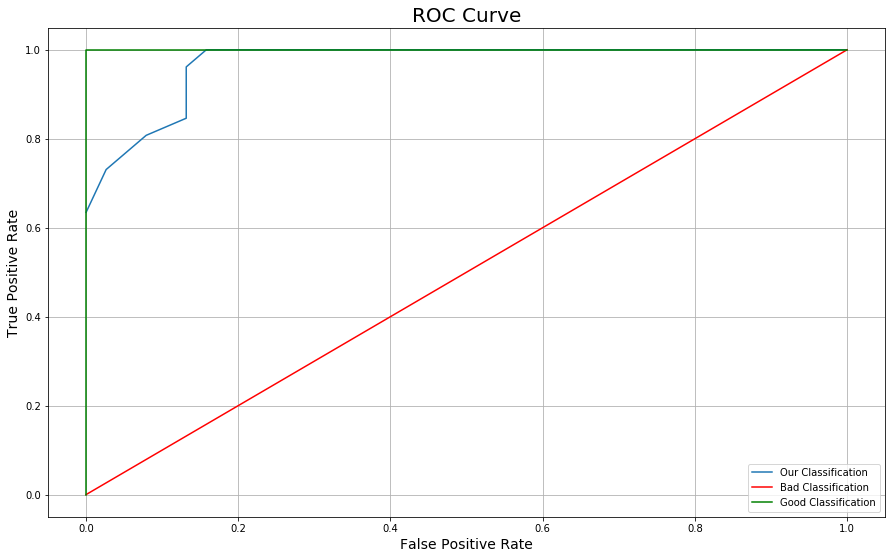

In [65]:
scores = roc_curve(test_target, classifier.predict_proba(test_data)[:,1])
FPR = scores[0]
TPR = scores[1]
plt.figure(figsize=(15,9))
plt.plot(FPR, TPR, label='Our Classification')
plt.plot([0,1],[0,1], c='r', label='Bad Classification')
plt.plot([0,0,1],[0,1,1], c='g', label='Good Classification')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=20)
plt.grid()
plt.legend(loc='lower right')

print 'ROC AUC Score : ', roc_auc_score(test_target, classifier.predict_proba(test_data)[:,1]).round(4)